# __BUSA8001 Final Group Assignment__




- Dinesh Rajasekar 45747229 
- Sanchit Salvi 46114858 
- Prathamesh Devaraju 46174095

Kaggle Team name : The 8001's


## __Acknowledgement__

 __Dean De Cock generated the Ames Housing dataset for use in data science studies. For data scientists looking for a new and enlarged version of the frequently mentioned Boston Housing dataset, this is a wonderful option.__




# __Task 1: Kaggle, Paper Review and Problem Description__


## __1. Dataset__

The dataset from Ammes Iowa contains  1460 observations and 80 variables which potrays about the sales prices over the span of 4 years from 2006 to 2010. There are multiple variables involved in the data (Continuous, Discrete, Target) which can impact the sales amount of houses in Iowa directly or indirectly. Possible buyers would look upto these characteristics before making any decisions.The dataset has to be scrutinized for the removal of the  missing values and categorical terms.

### __1.1 Forecasting Problem__

- In the dataset there 36 numerical features, many features resemble more of categorical  properties like: 
- Time ( which year was it build).
- Room and amenities ( no of rooms and bathrooms )
- Condition quality ( like ratings 1-10)
- Co-integration to sale price is absent.

- The sales price remain unimpacted by  categorical features like neighbourhood, external quality, MS Zoning , etc. ,
- The  ordinal features which  have to  be scaled accordingly :  ExterCond, ExterQual, Fence, FireplaceQu, Functional, GarageFinish, GarageQual, HeatingQC, KitchenQual, OverallCond, OverallQual, BsmtCond, BsmtQual, BsmtExposure, BsmtFinType1, BsmtFinType2, GarageCond, PavedDrive

- Outliers : Elimination of outlier features related to IQR range  has removed lot of data



### __2 Evaluation Criteria__

- The Mean absolute error method has been used , where we are predicting the errors ( RMSE ). The closer our predicted errors , the better and accurate our predictions are
- Our goal is to reduce the RMSE values after log transformation . 
- We also have clubbed three features together and have removed them : 
TotalSF  =TotalBsmtSF+ 1stFlrSF + 2ndFlrSF.
- After finally cleaning and handling the data  we split and trained our models in the test data using :
RidgeCV
LassoCV
EleasticNet CV
- And the ElasticNet CV gave the best R-squared value, and we processed our test data set and got the predictions. 





### __3 Dataset and Relevant features__

- After handling the ordinal , numerical and categorical features , the below features had a strong correlation with the sale price ( on plotting in the heatmap ) : 
OverallQual, YearBuilt, YearRemodAdd, MasvnrArea, BsmtFinSF1, TotalBsmtSF, 1stFlrSF, GrLiveArea, FullBath, TotRmsAbvGrd, GarageArea, WoodDeskSF,GarageArea, OpenPorchSF and WoodDeskSF. 
- Also, we have grouped the square feet area of floors into house and deleted those features as well. 
- And for features like these : FireplaceQu, BsmtCond, BsmtExposure, BsmtFinType , we replaced NA instead of 0 , so we don’t have issues during Missing data handling. 


### __4 Anticipated Issues and Complications__

- We tried Grid Search CV with 5-fold validations with multiple parameters , since it has to go through all the features with those many loops and parameters , the python compiler stopped working after 3 hours or crashed 
- Cutting down outliers based on IQR , was removing excess data from features.
- Actual prices of the houses seems to be  greater than the estimated sales of the houses.



# Task 2: Data Cleaning, Missing Observations and Feature Engineering {-}

In [134]:
import numpy as np
import pandas as pd
import datetime
import random
import math
# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

import os

cwd = os.getcwd()
print(cwd)


import gc

gc.enable()

from bokeh.io import output_notebook, show
from bokeh.models import (
    BasicTicker,
    ColorBar,
    ColumnDataSource,
    LinearColorMapper,
    PrintfTickFormatter,
)
from bokeh.plotting import figure
from bokeh.transform import transform


random_state = 55

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

C:\Users\Dinesh Rajasekar\Desktop\Sem 03 2021\Predictive\Group


In [2]:
# Read in the dataset as a dataframe
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.shape, test.shape

((1460, 81), (1459, 80))

In [3]:
# Joining the train and test dataset
# We will not drop the Id and salesprice price now but we will drop it when we do our modelling
df = pd.concat((train,test), axis=0)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [6]:
df.describe(include="all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,2919.000000,2919.000000,2915,2433.000000,2919.000000,2919,198,2919,2919,2917,2919,2919,2919,2919,2919,2919,2919,2919.000000,2919.000000,2919.000000,2919.000000,2919,2919,2918,2918,2895,2896.000000,2919,2919,2919,2838,2837,2837,2840,2918.000000,2839,2918.000000,2918.000000,2918.000000,2919,2919,2919,2918,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918,2919.000000,2917,2919.000000,1499,2762,2760.000000,2760,2918.000000,2918.000000,2760,2760,2919,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,10,571,105,2919.000000,2919.000000,2919.000000,2918,2919,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,2265,NaN,NaN,2907,120,1859,2622,2916,2133,2778,443,2511,2889,2425,1471,NaN,NaN,NaN,NaN,2310,2876,1025,1014,1742,NaN,1798,2538,1308,1283,2606,1904,851,NaN,2493,NaN,NaN,NaN,2874,1493,2723,2671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1492,NaN,2717,NaN,744,1723,NaN,1230,NaN,NaN,2604,2654,2641,NaN,NaN,NaN,NaN,NaN,NaN,4,329,95,NaN,NaN,NaN,2525,2402,NaN
mean,1460.000000,57.137718,NaN,69.305795,10168.114080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.089072,5.564577,1971.312778,1984.264474,NaN,NaN,NaN,NaN,NaN,102.201312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,441.423235,NaN,49.582248,560.772104,1051.777587,NaN,NaN,NaN,NaN,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,NaN,6.451524,NaN,0.597122,NaN,NaN,1978.113406,NaN,1.766621,472.874572,NaN,NaN,NaN,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,NaN,NaN,NaN,50.825968,6.213087,2007.792737,NaN,NaN,180921.195890
std,842.787043,42.517628,NaN,23.344905,7886.996359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.409947,1.113131,30.291442,20.894344,NaN,NaN,NaN,NaN,NaN,179.334253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,455.610826,NaN,169.205611,439.543659,440.766258,NaN,NaN,NaN,NaN,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,NaN,1.569379,NaN,0.646129,NaN,NaN,25.574285,NaN,0.761624,215.394815,NaN,NaN,NaN,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,NaN,NaN,NaN,567.402211,2.714762,1.314964,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,

In [7]:
categorical_data, numerical_data = [],[]
for a in df.columns:
    b=df.dtypes[a]
    if b == 'object':
        categorical_data.append(a)
    else:
        numerical_data.append(a)

print('Categorical_data:\n {}'.format(categorical_data))
print('Categorical features count: {}'.format(len(categorical_data)))
print('\nNumerical_data:\n {}'.format(numerical_data))
print('Numerical features count: {}'.format(len(numerical_data)))

Categorical_data:
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Categorical features count: 43

Numerical_data:
 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'Gara

In [8]:
a = df._get_numeric_data()
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   OverallQual    2919 non-null   int64  
 5   OverallCond    2919 non-null   int64  
 6   YearBuilt      2919 non-null   int64  
 7   YearRemodAdd   2919 non-null   int64  
 8   MasVnrArea     2896 non-null   float64
 9   BsmtFinSF1     2918 non-null   float64
 10  BsmtFinSF2     2918 non-null   float64
 11  BsmtUnfSF      2918 non-null   float64
 12  TotalBsmtSF    2918 non-null   float64
 13  1stFlrSF       2919 non-null   int64  
 14  2ndFlrSF       2919 non-null   int64  
 15  LowQualFinSF   2919 non-null   int64  
 16  GrLivArea      2919 non-null   int64  
 17  BsmtFullBath   2917 non-null   float64
 18  BsmtHalf

##### Displaying the columns that have years or months

In [9]:
year = [feature for feature in numerical_data if 'Mo' in feature or 'Yr' in feature or 'Year' in feature]
year

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']

##### Displaying the unique values of columns with data type 'Object'

In [10]:
for col in df.select_dtypes('O').columns:
    print('There are {} unique values in {} column : {}'.format(len(df[col].unique()), col , df[col].unique()))

There are 6 unique values in MSZoning column : ['RL' 'RM' 'C (all)' 'FV' 'RH' nan]
There are 2 unique values in Street column : ['Pave' 'Grvl']
There are 3 unique values in Alley column : [nan 'Grvl' 'Pave']
There are 4 unique values in LotShape column : ['Reg' 'IR1' 'IR2' 'IR3']
There are 4 unique values in LandContour column : ['Lvl' 'Bnk' 'Low' 'HLS']
There are 3 unique values in Utilities column : ['AllPub' 'NoSeWa' nan]
There are 5 unique values in LotConfig column : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
There are 3 unique values in LandSlope column : ['Gtl' 'Mod' 'Sev']
There are 25 unique values in Neighborhood column : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
There are 9 unique values in Condition1 column : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'

#### Handling missing values

In [11]:
# Here we will take a percentage of all missing values in data and display them.
nulls = df.isnull().sum().sort_values(ascending=False)
percentage_of_nulls = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([nulls, percentage_of_nulls], axis=1,keys=['Total_nulls', 'percentage']) 
missing_data

,Total_nulls,percentage
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471


#### Dividing the missing values in categorical and numerical

In [12]:
for feature in [feature for feature in categorical_data if df[feature].isnull().sum()]:
    print("{}: {}%".format(feature,np.round(df[feature].isnull().mean(),3)))

MSZoning: 0.001%
Alley: 0.932%
Utilities: 0.001%
Exterior1st: 0.0%
Exterior2nd: 0.0%
MasVnrType: 0.008%
BsmtQual: 0.028%
BsmtCond: 0.028%
BsmtExposure: 0.028%
BsmtFinType1: 0.027%
BsmtFinType2: 0.027%
Electrical: 0.0%
KitchenQual: 0.0%
Functional: 0.001%
FireplaceQu: 0.486%
GarageType: 0.054%
GarageFinish: 0.054%
GarageQual: 0.054%
GarageCond: 0.054%
PoolQC: 0.997%
Fence: 0.804%
MiscFeature: 0.964%
SaleType: 0.0%


In [13]:
for feature in [feature for feature in numerical_data if df[feature].isnull().sum()]:
    print("{}: {}%".format(feature,np.round(df[feature].isnull().mean(),3)))

LotFrontage: 0.166%
MasVnrArea: 0.008%
BsmtFinSF1: 0.0%
BsmtFinSF2: 0.0%
BsmtUnfSF: 0.0%
TotalBsmtSF: 0.0%
BsmtFullBath: 0.001%
BsmtHalfBath: 0.001%
GarageYrBlt: 0.054%
GarageCars: 0.0%
GarageArea: 0.0%
SalePrice: 0.5%


In [14]:
# There are no miscellaneous features i.e features like 'Alley', 'Fence', 'MiscFeature','PoolQC', 'FireplaceQu', 'MasVnrType' (categorical_data)
# We will fill these features with none.

misc = ['Alley', 'Fence', 'MiscFeature','PoolQC', 'FireplaceQu', 'MasVnrType']
for mis in misc:
    df[mis].fillna('None', inplace=True)

In [16]:
# Features of basement (categorical_data) 'BsmtQual', 'BsmtCond','BsmtExposure' 'BsmtFinType1','BsmtFinType2'
basement = ['BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1','BsmtFinType2']
for base in basement:
    df[base].fillna('None',inplace=True)

In [17]:
basement_numerical = ['MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF']
for basenum in basement_numerical:
    df[basenum].fillna(0, inplace=True)

In [18]:
# Categorical features of Garage features 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'

In [19]:
garage_cat = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for gar in garage_cat:
    df[gar].fillna('None', inplace=True)

In [20]:
# Replacing Other Categorical Variable with its mode
df['MSZoning']=df['MSZoning'].fillna(df['MSZoning'].mode()[0])
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])
df['Functional']=df['Functional'].fillna(df['Functional'].mode()[0])
df['KitchenQual']=df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])
df['SaleType']=df['SaleType'].fillna(df['SaleType'].mode()[0])
df['Utilities']=df['Utilities'].fillna(df['Utilities'].mode()[0])
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())
df['Exterior1st'].fillna('Other' ,inplace=True)
df['Exterior2nd'].fillna('Other' ,inplace=True)

In [21]:
df.fillna({'GarageCars':0, 'GarageArea': 0}, inplace = True)

In [22]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000.0


In [23]:
df.describe(include="all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,2919.000000,2919.000000,2919,2919.000000,2919.000000,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919.000000,2919.000000,2919.000000,2919.000000,2919,2919,2919,2919,2919,2919.000000,2919,2919,2919,2919,2919,2919,2919,2919.000000,2919,2919.000000,2919.000000,2919.000000,2919,2919,2919,2919,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919,2919.000000,2919,2919.000000,2919,2919,2919.000000,2919,2919.000000,2919.000000,2919,2919,2919,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919,2919,2919,2919.000000,2919.000000,2919.000000,2919,2919,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,3,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,16,16,4,NaN,4,5,6,5,5,5,7,NaN,7,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,6,7,NaN,4,NaN,NaN,6,6,3,NaN,NaN,NaN,NaN,NaN,NaN,4,5,5,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,None,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,2269,NaN,NaN,2907,2721,1859,2622,2918,2133,2778,443,2511,2889,2425,1471,NaN,NaN,NaN,NaN,2310,2876,1025,1014,1766,NaN,1798,2538,1308,1283,2606,1904,851,NaN,2493,NaN,NaN,NaN,2874,1493,2723,2672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1493,NaN,2719,NaN,1420,1723,NaN,1230,NaN,NaN,2604,2654,2641,NaN,NaN,NaN,NaN,NaN,NaN,2909,2348,2814,NaN,NaN,NaN,2526,2402,NaN
mean,1460.000000,57.137718,NaN,69.305795,10168.114080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.089072,5.564577,1971.312778,1984.264474,NaN,NaN,NaN,NaN,NaN,101.396026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,441.272011,NaN,49.565262,560.579993,1051.417266,NaN,NaN,NaN,NaN,1159.581706,336.483727,4.694416,1500.759849,0.429599,0.061322,1.568003,0.380267,2.860226,1.044536,NaN,6.451524,NaN,0.597122,NaN,NaN,1978.161699,NaN,1.766016,472.712573,NaN,NaN,NaN,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,NaN,NaN,NaN,50.825968,6.213087,2007.792737,NaN,NaN,180921.195890
std,842.787043,42.517628,NaN,21.312345,7886.996359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.409947,1.113131,30.291442,20.894344,NaN,NaN,NaN,NaN,NaN,178.854579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,455.606014,NaN,169.179104,439.590889,441.120498,NaN,NaN,NaN,NaN,392.362079,428.701456,46.396825,506.051045,0.524676,0.245608,0.552969,0.502872,0.822693,0.214462,NaN,1.569379,NaN,0.646129,NaN,NaN,24.868576,NaN,0.762196,215.535686,NaN,NaN,NaN,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,NaN,NaN,NaN,567.402211,2.714762,1.314964,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,N

In [24]:
nulls = df.isnull().sum().sort_values(ascending=False)
percentage_of_nulls = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([nulls, percentage_of_nulls], axis=1,keys=['Total_nulls', 'percentage']) 
missing_data

,Total_nulls,percentage
SalePrice,1459,0.499829
Heating,0,0.000000
RoofStyle,0,0.000000
RoofMatl,0,0.000000
Exterior1st,0,0.000000
Exterior2nd,0,0.000000
MasVnrType,0,0.000000
MasVnrArea,0,0.000000
ExterQual,0,0.000000
ExterCond,0,0.000000


## Correlation

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
GarageYrBlt      0.469056
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334820
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

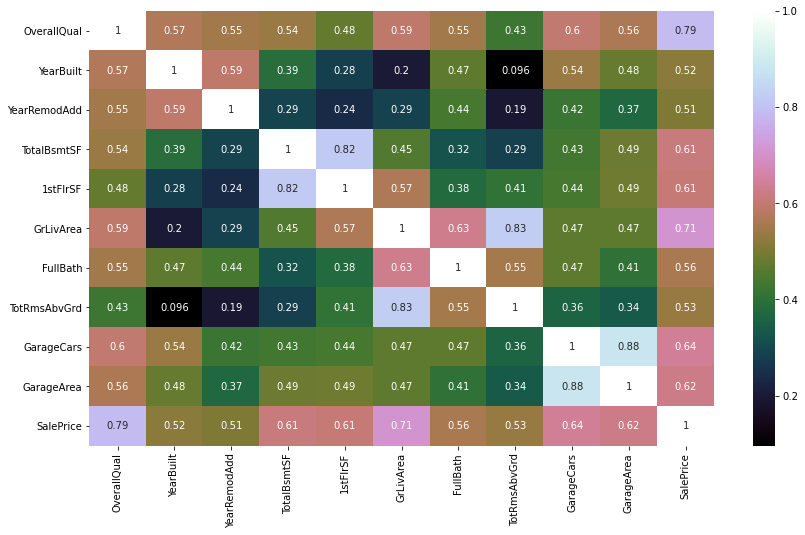

In [25]:
corr =df.corr()
corr.sort_values(['SalePrice'], ascending= False, inplace=True)
print(corr.SalePrice)
correlationmat = train.corr()
top_corr = correlationmat.index[abs(correlationmat["SalePrice"])>0.5]
plt.figure(figsize=(14,8))
g=sns.heatmap(train[top_corr].corr(),annot=True,cmap='cubehelix')

### Categories in number

In [26]:
cat_num = [feature for feature in numerical_data if len(df[feature].unique())<20 and feature not in year+['Id']]

In [27]:
contineous_var = [feature for feature in numerical_data if len(df[feature]) and feature not in year+['Id']+cat_num]

In [28]:
c1 = [feature for feature in numerical_data if len(df[feature]) and feature not in year+['Id']+cat_num+['SalePrice']]

In [29]:
c1

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal']

In [30]:
contineous_var

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

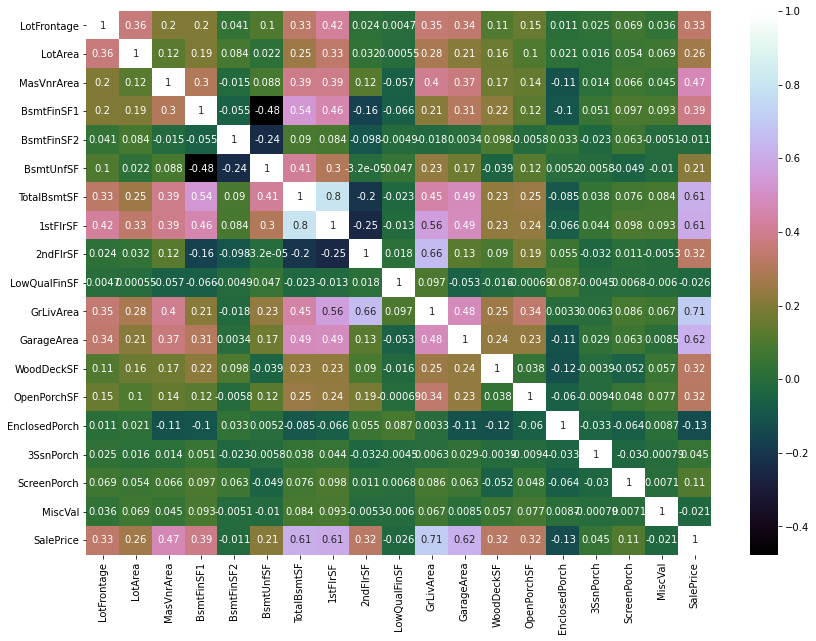

In [31]:
plt.figure(figsize=(14,10))
g1=sns.heatmap(df[contineous_var].corr(),annot=True,cmap='cubehelix')


In [32]:
year

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']

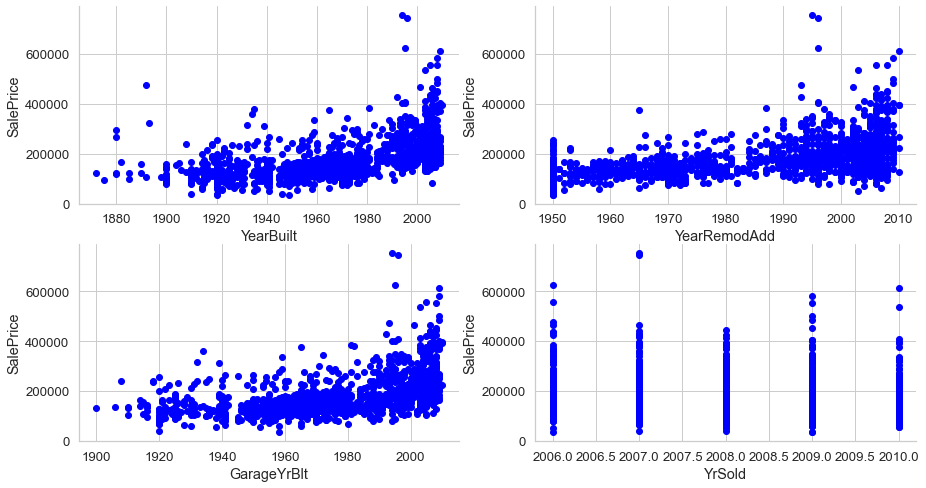

In [33]:
y1 = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
plt.figure(figsize=(15, 8))
sns.set(font_scale= 1.2)
sns.set_style('whitegrid')

for i, features in enumerate(y1):
    plt.subplot(2, 2, i+1)
    plt.scatter(data=train, x=features, y='SalePrice', color ="blue")  
    plt.xlabel(features)
    plt.ylabel('SalePrice')
    
sns.despine()

Here we can see a specific pattern between YearBuilt and GarageYrBlt as they are highly correlated with SalePrice. As the time increases the sales price of the houses also increases in case of YearBlt and GarageYrBlt. In case of the renovated houses i.e YearRemodAdd the price again increases wrt to time.  

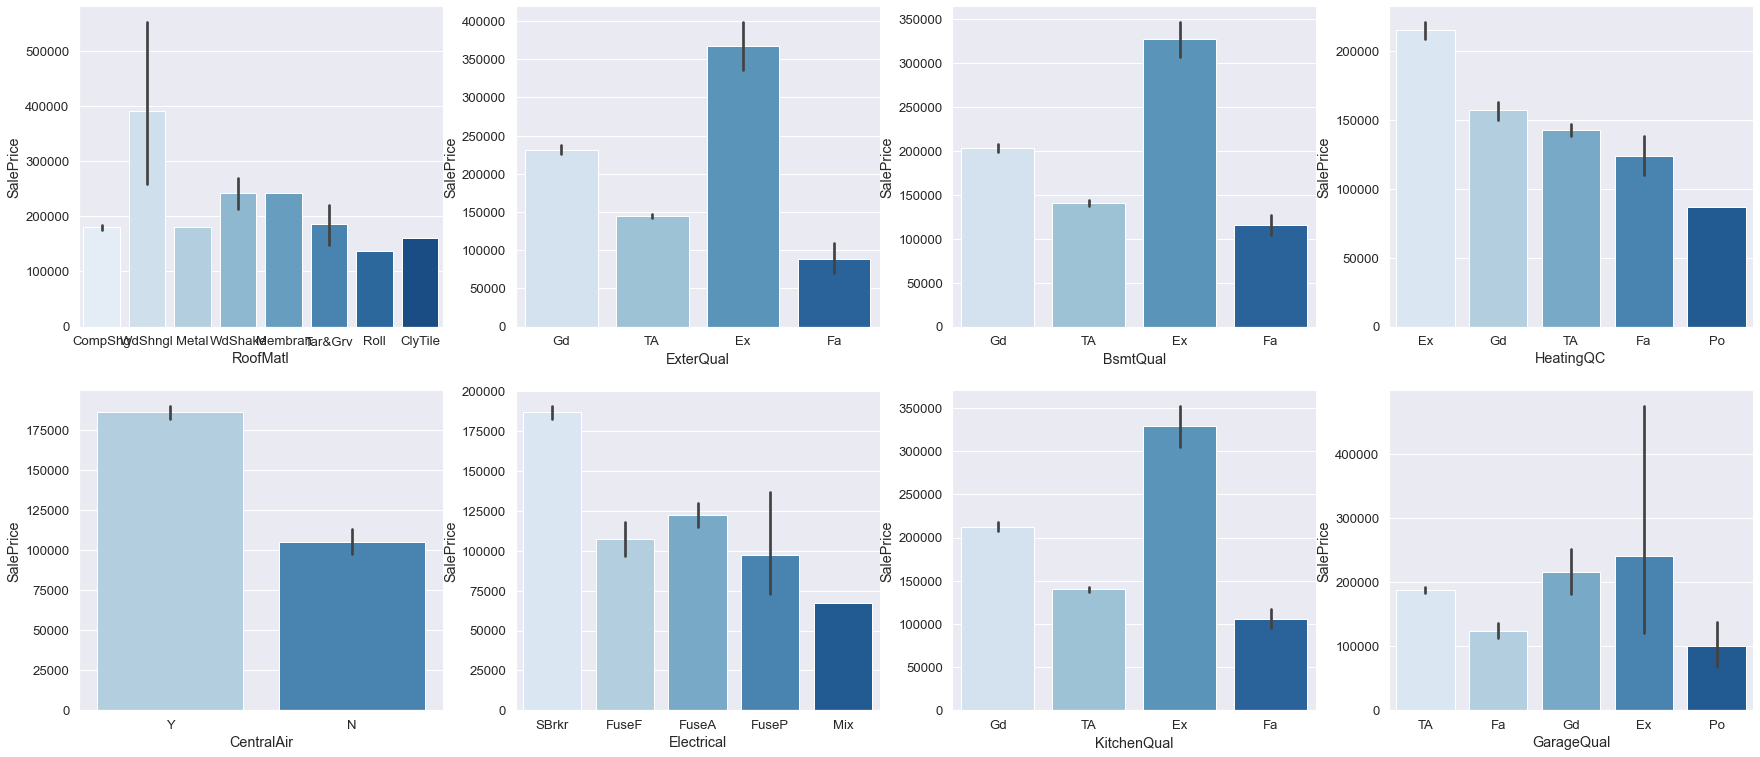

In [34]:
Quality_features = [ 'RoofMatl', 'ExterQual', 'BsmtQual', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'GarageQual']

plt.figure(figsize=(30, 20))
sns.set(font_scale= 1.2)
sns.set_style('darkgrid')

for i, feature in enumerate(Quality_features):
    plt.subplot(3, 4, i+1)
    sns.barplot(data=train, x=feature, y='SalePrice', palette="Blues")  
    
    
sns.despine()

### Outliers

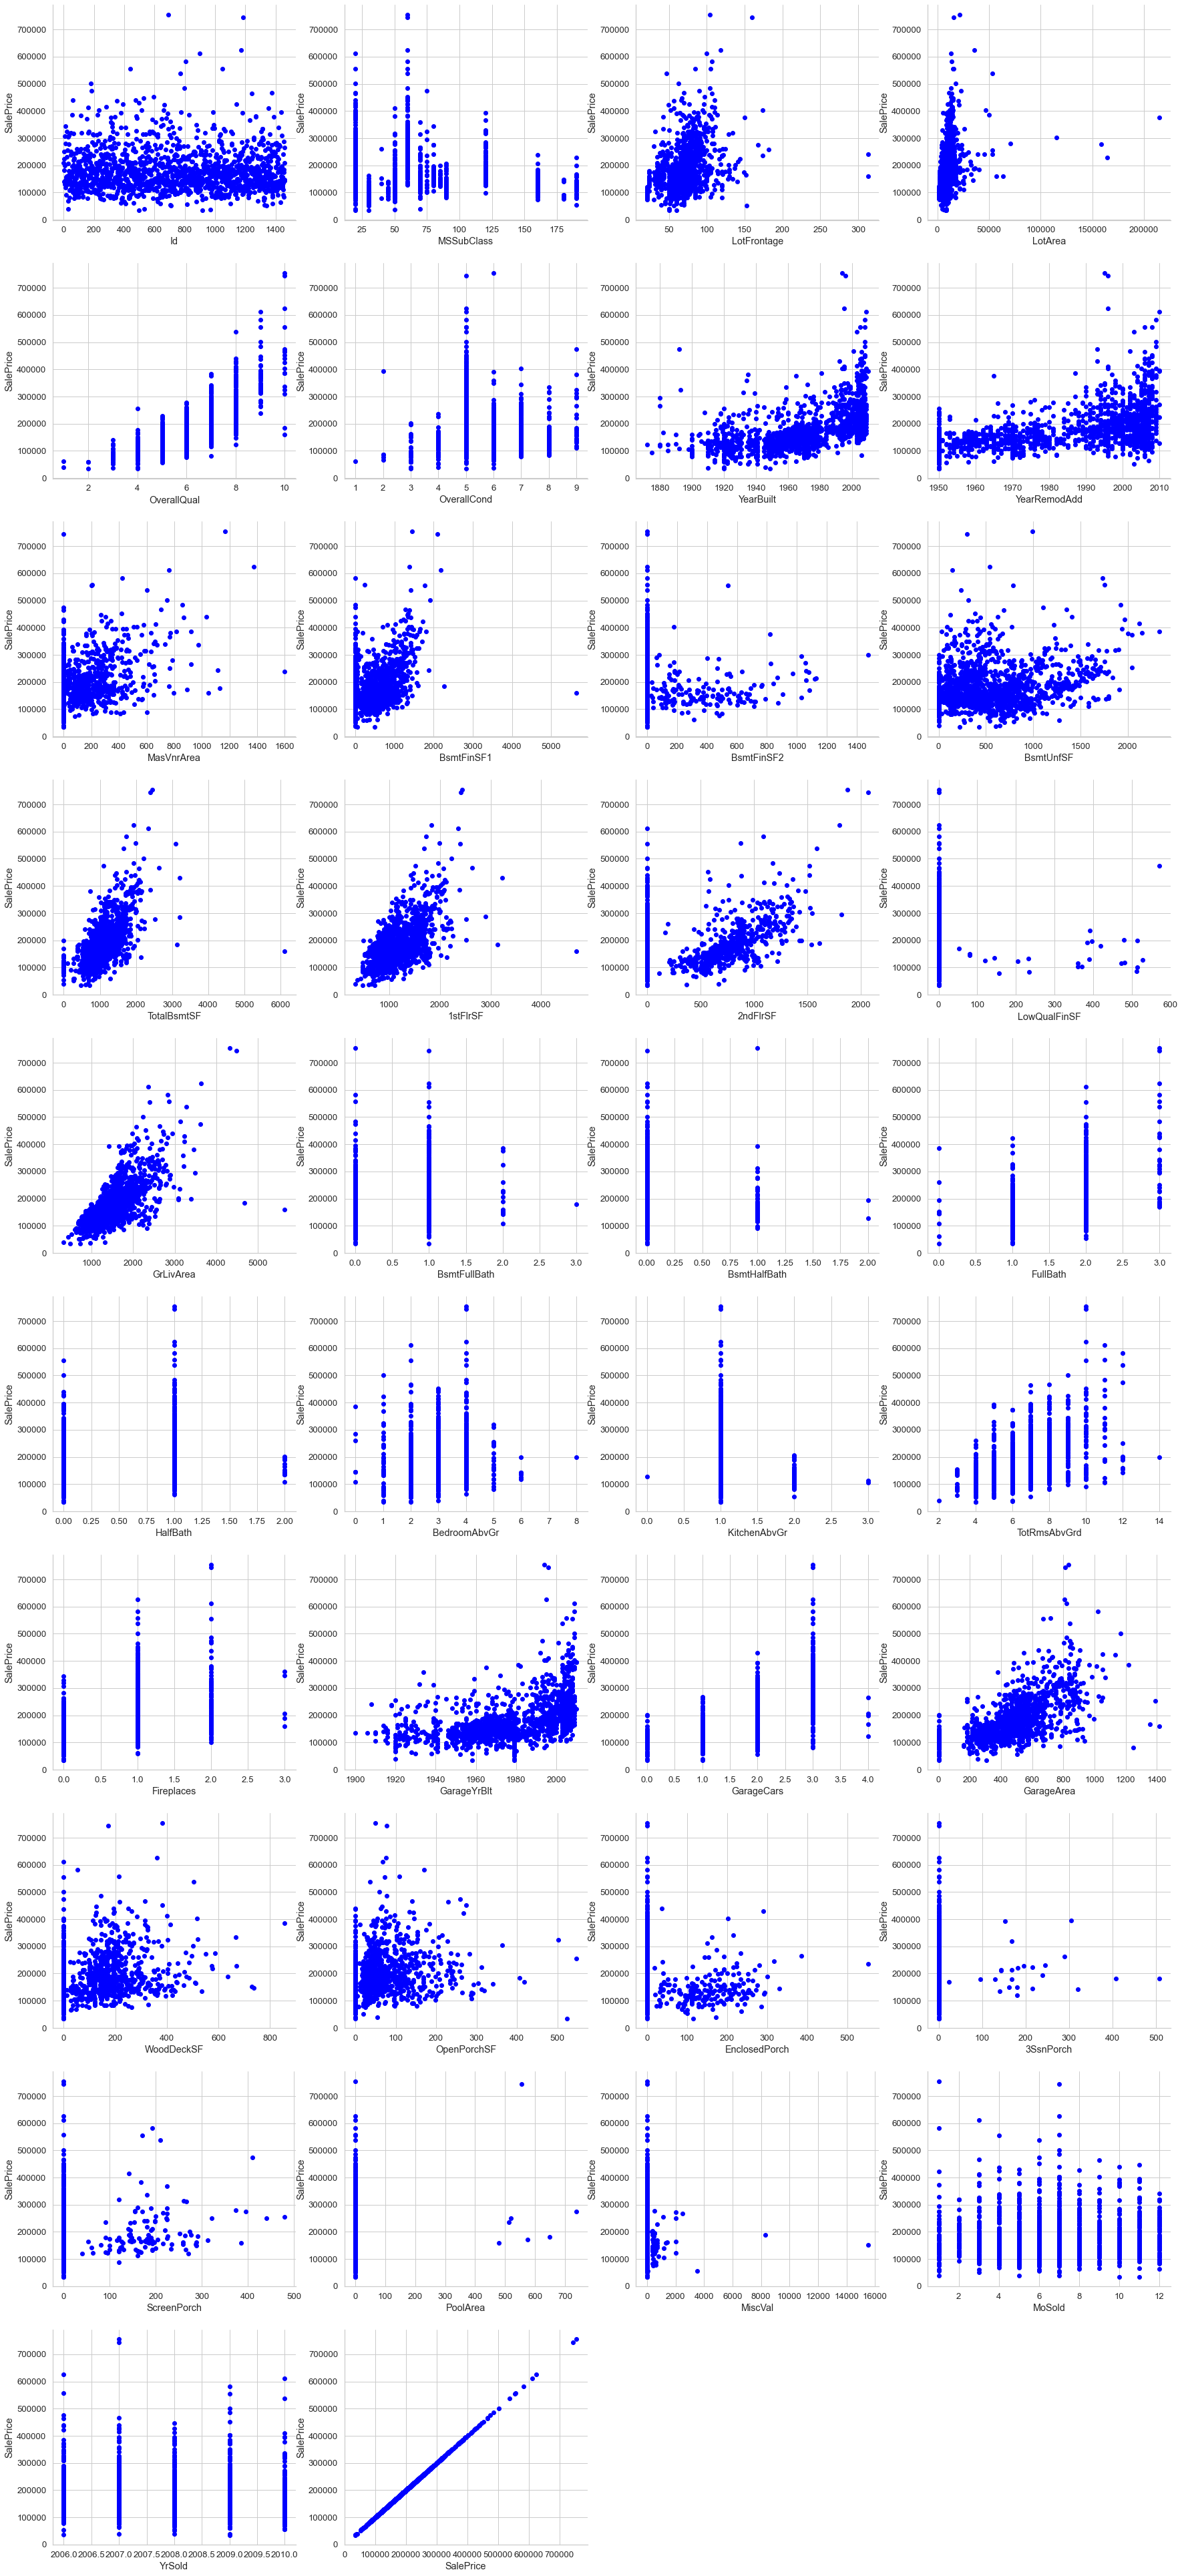

In [35]:
plt.figure(figsize=(30, 70))
sns.set(font_scale= 1.2)
sns.set_style('whitegrid')

for i, features in enumerate(numerical_data):
    plt.subplot(10, 4, i+1)
    plt.scatter(data=df.iloc[:len(train)], x=features, y='SalePrice', color ="blue")
    plt.xlabel(features)
    plt.ylabel('SalePrice')
    
    
sns.despine()

from above graphs we can see the varibles LotFrontage, LotArea, MasVnrArea, BsmtFinsf1, TotalBsmtsf, 1stFlrsf, 2ndFlrsf, GrLivArea, GrageArea 
these variables have high outliers. Which means large areas for very low prices. Thus we can replace these outliers by its lower values which we will replce in the latter part in this notebook.

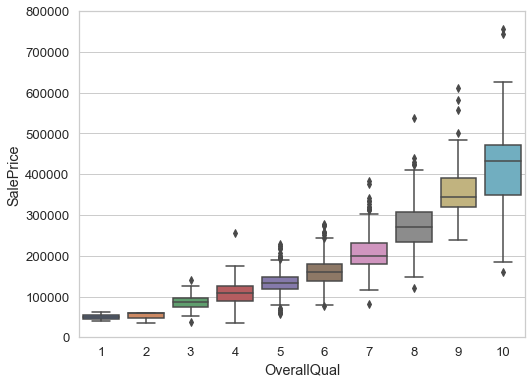

In [36]:
data = pd.concat([train['SalePrice'], train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

It is not surprise that overall quality has the highest correlation with SalePrice among the numeric variables (0.79). It rates the overall material and finish of the house on a scale from 1 (very poor) to 10 (very excellent). The positive correlation is certainly there indeed, and seems to be a slightly upward curve. Regarding outliers, we do not see any extreme values. If there is a candidate to take out as an outlier later on, it seems to be the expensive house with grade 4.

Especially the two houses with really big living areas and low SalePrices seem outliers. I will not take them out yet, as taking outliers can hamper the modelling part in the latter part. For instance, a low score on the Overall Quality could explain a low price. However,in the above figure, these two houses actually also score maximum points on Overall Quality. Therefore, we will keep these houses in mind as prime candidates to take out as outliers.

In [37]:
# def mod_outlier(df):
#         df1 = df.copy()
#         df = df[c1]


#         q1 = df.quantile(0.25)
#         q3 = df.quantile(0.75)

#         iqr = q3 - q1

#         lower_bound = q1 -(1.5 * iqr) 
#         upper_bound = q3 +(1.5 * iqr)


#         for col in df.columns:
#             for i in range(0,len(df[col])):
#                 if df[col][i] < lower_bound[col]:            
#                     df[col][i] = lower_bound[col]

#                 if df[col][i] > upper_bound[col]:            
#                     df[col][i] = upper_bound[col]    


#         for col in df.columns:
#             df1[col] = df[col]

#         return(df1)

# df = mod_outlier(df)

In [38]:
df.LotFrontage[(df.LotFrontage >= 160)] = 160
df.LotArea[(df.LotArea >= 75000)] = 75000
df.MasVnrArea[(df.MasVnrArea >= 1000)] = 1000
df.BsmtFinSF1[(df.BsmtFinSF1 >= 2500)] = 2500
df.TotalBsmtSF[(df.TotalBsmtSF >= 3000)] = 3000
df['1stFlrSF'][(df['1stFlrSF'] >= 3000)] = 3000
df.GrLivArea[(df.GrLivArea >= 3500)] = 3500
df.GarageArea[(df.GarageArea >= 1500)] = 1500

### Data Transformation

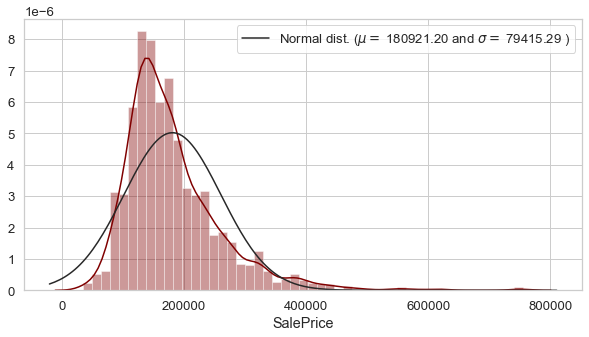

In [39]:
plt.figure(figsize=(10, 5))
from scipy import stats
from scipy.stats import norm, skew
sns.distplot(df.iloc[:len(train)]['SalePrice'] , fit=norm, color='maroon');
(mu, sigma) = norm.fit(df.iloc[:len(train)]['SalePrice'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

From the above plot we can see that the data is right-skewed and thus we will have to convert it into normal distribution.

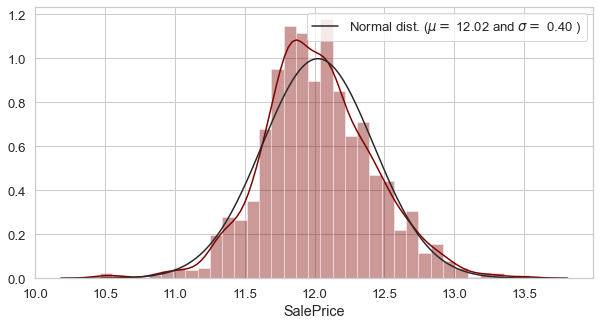

In [40]:
plt.figure(figsize=(10, 5))
df['SalePrice'] = np.log1p(df.iloc[:len(train)]['SalePrice'])
sns.distplot(df.iloc[:len(train)]['SalePrice'] , fit=norm, color='maroon')
(mu, sigma) = norm.fit(df.iloc[:len(train)]['SalePrice'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

In [41]:
#if it is more than 1 or -1 it is highly skewed and between 0.5 and 1 it is moderatly skewed, between 0.5 and 0 it is almost symmetric
skewness = df[contineous_var].apply(lambda x: skew(x.dropna())) #compute skewness
skewness= skewness[skewness > 0.75]
skewness= skewness.index

df[skewness] = np.log1p(df[skewness])

The objective of choosing features with skewness>0.75 is because we are searching to work with features that have a more normal-like distribution so this why we apply a log transformation so to normalize the distribution ( skewness =0) because models work better on normalized data. 

In [42]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,9.042040,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.283204,Gd,TA,PConc,Gd,TA,No,GLQ,6.561031,Unf,0.0,5.017280,856.0,GasA,Ex,Y,SBrkr,6.753438,6.751101,0.0,7.444833,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.000000,4.127134,0.000000,0.0,0.0,0,None,None,None,0.0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9.169623,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,6.886532,Unf,0.0,5.652489,1262.0,GasA,Ex,Y,SBrkr,7.141245,0.000000,0.0,7.141245,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,5.700444,0.000000,0.000000,0.0,0.0,0,None,None,None,0.0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,9.328212,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.093750,Gd,TA,PConc,Gd,TA,Mn,GLQ,6.188264,Unf,0.0,6.075346,920.0,GasA,Ex,Y,SBrkr,6.825460,6.765039,0.0,7.488294,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.000000,3.761200,0.000000,0.0,0.0,0,None,None,None,0.0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9.164401,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,5.379897,Unf,0.0,6.293419,756.0,GasA,Gd,Y,SBrkr,6.869014,6.629363,0.0,7.448916,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0.000000,3.583519,5.609472,0.0,0.0,0,None,None,None,0.0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,9.565284,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.860786,Gd,TA,PConc,Gd,TA,Av,GLQ,6.486161,Unf,0.0,6.196444,1145.0,GasA,Ex,Y,SBrkr,7.044033,6.960348,0.0,7.695758,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,5.262690,4.442651,0.000000,0.0,0.0,0,None,None,None,0.0,12,2008,WD,Normal,12.429220


In [43]:
df.shape

(2919, 81)

In [44]:
df =pd.get_dummies(df, columns=categorical_data, drop_first=True)

In [45]:
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

We add TotalBsmtSF, 1stFlrSF and 2ndFlrSF by considering that they are a part of a 2 storied house and combine it into a new variable.

In [46]:
del df['TotalBsmtSF']

In [47]:
del df['1stFlrSF']

In [48]:
del df['2ndFlrSF']

In [49]:
df.shape

(2919, 260)

# TASK 3 | Modelling 

Here we are tying to build a ML models and trying to predict the outcomes 

In [50]:
from sklearn.model_selection import train_test_split

Here we are splitting the dataframe to train and test 

In [51]:
new_train = df.iloc[:1460,:]
new_test = df.iloc[1460:,:]

In [52]:
x = new_train.drop(['SalePrice'], axis=1)
y = new_train['SalePrice']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42) # 75% training and 25% test

In [54]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [55]:
def print_metrics(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

### Ridge CV 

In [56]:
ridge = RidgeCV(alphas = [1, 0.1, 0.001, 0.0005])
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)

test_pred = ridge.predict(X_test)
train_pred = ridge.predict(X_train)

print('Test set evaluation:\n')
print_metrics(y_test, test_pred)
print('*'*30)
print('Train set evaluation:\n')
print_metrics(y_train, train_pred)

Test set evaluation:

MAE: 0.08613474706698844
MSE: 0.016323502418557154
RMSE: 0.1277634627683406
R2 Square 0.9057300974011795
******************************
Train set evaluation:

MAE: 0.065188513232579
MSE: 0.00898393667993219
RMSE: 0.09478363086489244
R2 Square 0.9419213356301227


In [57]:
final_test=new_test.copy()

In [58]:
X = new_test.drop(['SalePrice'], axis=1)
Y = new_test[['SalePrice']]

In [59]:
final_test['SalePrice'] = np.expm1(ridge.predict(X))
final_test['Id'] = new_test['Id']


    If we want to export the score and check , we use the below :

In [68]:

logistic_submission = final_test[['Id','SalePrice']]
logistic_submission.to_csv("Ridge.csv", index=False)
logistic_submission.tail()

,Id,SalePrice
1454,2915,87720.417920
1455,2916,89490.306251
1456,2917,167687.340922
1457,2918,118684.906614
1458,2919,225432.191016


### Lasso CV

In [69]:
lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005])
lasso.fit(X_train, y_train)

test_pred = lasso.predict(X_test)
train_pred = lasso.predict(X_train)

print('Test set evaluation:\n')
print_metrics(y_test, test_pred)
print('*'*30)
print('Train set evaluation:\n')
print_metrics(y_train, train_pred)

Test set evaluation:

MAE: 0.08438470102743642
MSE: 0.015892631859327797
RMSE: 0.12606598216540335
R2 Square 0.9082184191234267
******************************
Train set evaluation:

MAE: 0.07548590262540446
MSE: 0.01332778802457526
RMSE: 0.11544603944949892
R2 Square 0.9138395388292052


In [70]:
final_test['SalePrice'] = np.expm1(lasso.predict(X))
final_test['Id'] = new_test['Id']



If we want to export the score and check , we use the below :

In [71]:
logistic_submission1 = final_test[['Id','SalePrice']]
logistic_submission1.to_csv("lassoCV.csv", index=False)
logistic_submission1.tail()

,Id,SalePrice
1454,2915,88501.755624
1455,2916,90512.970435
1456,2917,169755.422536
1457,2918,120299.913639
1458,2919,231519.267467


### ElasticNetCV

In [72]:
E_model = ElasticNetCV(alphas = [1, 0.1, 0.001, 0.0005])
E_model.fit(X_train, y_train)

test_pred = E_model.predict(X_test)
train_pred = E_model.predict(X_train)

print('Test set evaluation:\n')
print_metrics(y_test, test_pred)
print('*'*30)
print('Train set evaluation:\n')
print_metrics(y_train, train_pred)

Test set evaluation:

MAE: 0.08359731763849787
MSE: 0.01598138602547517
RMSE: 0.12641750679979086
R2 Square 0.9077058547004606
******************************
Train set evaluation:

MAE: 0.07171736416332518
MSE: 0.011659866885537537
RMSE: 0.10798086351542822
R2 Square 0.9246221874030737


In [73]:
final_test['SalePrice'] = np.expm1(E_model.predict(X))
final_test['Id'] = new_test['Id']


In [74]:
logistic_submission2 = final_test[['Id','SalePrice']]
logistic_submission2.to_csv("ElasticNetCV.csv", index=False)
logistic_submission2.tail()

,Id,SalePrice
1454,2915,87720.417920
1455,2916,89490.306251
1456,2917,167687.340922
1457,2918,118684.906614
1458,2919,225432.191016


In [75]:
logistic_submission2.head()

,Id,SalePrice
0,1461,114786.531345
1,1462,152260.144756
2,1463,181950.992179
3,1464,195812.715825
4,1465,206886.819654


### Lasso

In [76]:
lasso.fit(X_train, y_train)
train_pred = np.expm1(lasso.predict(X_train))
pred = np.expm1(lasso.predict(X_test))
print('Test set evaluation:\n')
print_metrics(np.expm1(y_test), pred)
print('*'*30)
print('Train set evaluation:\n')
print_metrics(np.expm1(y_train),train_pred)

Test set evaluation:

MAE: 14861.794852975889
MSE: 670184759.0270655
RMSE: 25887.926897051173
R2 Square 0.9043318782911844
******************************
Train set evaluation:

MAE: 13951.067710743348
MSE: 706708397.6441939
RMSE: 26583.987617439823
R2 Square 0.8836012872656295


In [77]:
final_test['SalePrice'] = np.expm1(lasso.predict(X))
final_test['Id'] = new_test['Id']



In [78]:
logistic_submission3 = final_test[['Id','SalePrice']]
logistic_submission3.to_csv("Lasso.csv", index=False)
logistic_submission3.tail()

,Id,SalePrice
1454,2915,88501.755624
1455,2916,90512.970435
1456,2917,169755.422536
1457,2918,120299.913639
1458,2919,231519.267467


In [79]:
logistic_submission3.head()

,Id,SalePrice
0,1461,115498.595199
1,1462,151963.399181
2,1463,182421.241085
3,1464,198257.094622
4,1465,203304.704797


### GBoost

In [80]:
GBoost = GradientBoostingRegressor(n_estimators=5000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
#RMSE estimated through the partition of the train set
GBoost.fit(X_train, y_train)
y_predictGB = GBoost.predict(X_test)

In [81]:
print('Test set evaluation:\n')
print_metrics(np.expm1(y_test), y_predictGB)
# print('*'*30)
# print('Train set evaluation:\n')
# print_evaluate(np.expm1(y_train),train_pred)

Test set evaluation:

MAE: 178535.91967889536
MSE: 38880324292.20882
RMSE: 197180.9430249506
R2 Square -4.550122628669077


In [82]:
print(GBoost.score(X_test,y_test))

0.9044232670509883


In [83]:
final_test['SalePrice'] = np.expm1(GBoost.predict(X))
final_test['Id'] = new_test['Id']


In [84]:
logistic_submission4 = final_test[['Id','SalePrice']]
logistic_submission4.to_csv("GBoost.csv", index=False)
logistic_submission4.tail()

,Id,SalePrice
1454,2915,83388.646576
1455,2916,90065.078987
1456,2917,174115.749975
1457,2918,124242.214820
1458,2919,215247.474550


## HyperTuning Parameters

Here we are doing a hypertuning parameters - where based on the number of Cross valiadationns | CV value and the parameters , it will run those many loops across the features. 

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
param_grid=[{'kernel': ['rbf', 'poly'],
             'C': [10],
            'epsilon': [0.01],
            'gamma': [0.001]
        }]
gsc = GridSearchCV(
        estimator=SVR(),
        param_grid = param_grid,
        cv=2, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

In [88]:
gsc.fit(X_train, y_train)

In [87]:
y_pred = gsc.predict(X_test)
y_pred = np.exp(y_pred

In [89]:
gsc.score(X_train, y_train)

In [90]:
submission = pd.DataFrame({"Id": Id_submission, "SalePrice": y_pred})
submission.to_csv("submission3.csv", index=False)

### LBGM Regressor

In [91]:
from lightgbm import LGBMRegressor
lgbm =  LGBMRegressor()
param_lgb = {
    "boosting_type" :['gbdt','goss','rf'],
    "num_leaves":[12,14,16,18],
    "max_depth": [-1],
    "n_estimators": [100,125,143 , 145, 165], 
    "learning_rate":[0.01,0.1,0.125]}

gsc_lgb = GridSearchCV(
        estimator = lgbm,
        param_grid = param_lgb,
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

In [92]:
%%time
gsc_lgb.fit(X_train, y_train)

Wall time: 1min 6s


GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'goss', 'rf'],
                         'learning_rate': [0.01, 0.1, 0.125], 'max_depth': [-1],
                         'n_estimators': [100, 125, 143, 145, 165],
                         'num_leaves': [12, 14, 16, 18]},
             scoring='neg_mean_squared_error')

In [93]:
gsc_lgb.best_params_
gsc_lgb.score(X_train, y_train)

-0.0025651402646675227

In [94]:
y_pred = gsc_lgb.predict(X)
y_pred = np.exp(y_pred)


In [95]:
  
submission = pd.DataFrame({"Id": X['Id'], "SalePrice": y_pred})
submission.to_csv("submission_7.csv", index=False)


## Stacking CV Regressor

In [96]:
from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge

stack = StackingCVRegressor(
    regressors=[lgbm],
    meta_regressor=LinearRegression(n_jobs=-1),
    random_state=random_state,
    cv=5,
    n_jobs=-1,)

In [97]:
cv=5

stack_scores = cross_val_score(
    stack, X_train, y_train, cv=cv, n_jobs=-1, error_score="neg_root_mean_squared_error"
)

stack.fit(X_train, y_train)

StackingCVRegressor(meta_regressor=LinearRegression(n_jobs=-1), n_jobs=-1,
                    random_state=55, regressors=[LGBMRegressor()])

In [98]:
y_pred = stack.predict(X)
y_pred = np.exp(y_pred)

submission = pd.DataFrame({"Id": X['Id'], "SalePrice": y_pred})
submission.to_csv("submission_8.csv", index=False)

## Random Forest

In [99]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(criterion = 'mse')

In [100]:
param_grid=[{"max_depth":[6, 7, 8, 9, 10], "max_features":[20, 30, 40, 50, 60], "n_estimators": [100, 125, 150, 175, 200]}]
gsc_rf = GridSearchCV(
        estimator= rf,
        param_grid = param_grid,
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

In [101]:
%%time
gsc_rf.fit(X_train, y_train)

Wall time: 3min 34s


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'max_depth': [6, 7, 8, 9, 10],
                          'max_features': [20, 30, 40, 50, 60],
                          'n_estimators': [100, 125, 150, 175, 200]}],
             scoring='neg_mean_squared_error')

In [102]:
gsc_rf.best_params_
gsc_rf.score(X_train, y_train)

-0.0042331034868218365

### Score Comparison

In [119]:
lgbm_scores = cross_val_score(
    lgbm, X_train, y_train, cv=cv, n_jobs=-1, error_score="neg_root_mean_squared_error"
)
ridge_scores = cross_val_score(
    ridge, X_train, y_train, cv=cv, n_jobs=-1, error_score="neg_root_mean_squared_error"
)
lasso_scores = cross_val_score(
    lasso, X_train, y_train, cv=cv, n_jobs=-1, error_score="neg_root_mean_squared_error"
)
ElasticCV_scores = cross_val_score(
    E_model, X_train, y_train, cv=cv, n_jobs=-1, error_score="neg_root_mean_squared_error"
)
GBoost_scores = cross_val_score(
    GBoost, X_train, y_train, cv=cv, n_jobs=-1, error_score="neg_root_mean_squared_error"
)
stack_scores = cross_val_score(
    stack, X_train, y_train, cv=cv, n_jobs=-1, error_score="neg_root_mean_squared_error"
)
rf_scores = cross_val_score(
    rf, X_train, y_train, cv=cv, n_jobs=-1, error_score="neg_root_mean_squared_error"
)

scores = []
scores = [lgbm_scores, ridge_scores, lasso_scores, ElasticCV_scores, GBoost_scores, stack_scores,rf_scores]
models = ["LightGBM", "ridge", "Lasso", "ElasticCV", "GBoost", "STACK","RF"]

In [123]:
score_medians = [
    round(np.median([mean for mean in modelscore]), 5) for modelscore in scores
]


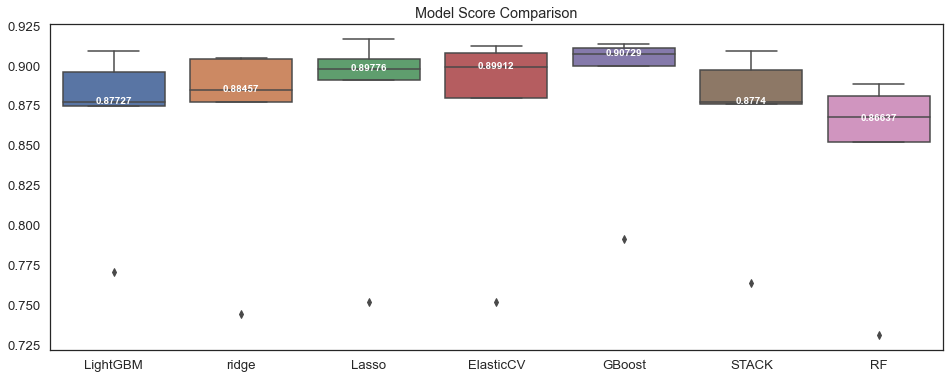

In [122]:
fig, ax = plt.subplots(figsize=(16, 6))

vertical_offset = 0.001

ax.set_title("Model Score Comparison")
bp = sns.boxplot(x=models, y=scores, ax=ax)


for xtick in bp.get_xticks():
    bp.text(
        xtick,
        score_medians[xtick] - vertical_offset,
        score_medians[xtick],
        horizontalalignment="center",
        size=10,
        color="w",
        weight="semibold",
    )

plt.show()